## Richter's Predictor: Modeling Earthquake Damage
##### Hosted by <a href='https://www.drivendata.org/'>Driven Data</a>
<br>

<img src="https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG" width="600" height="350">
<br>
<br>

The Capstone project was carried out with the support of the competition made available by <a href='https://www.drivendata.org/'>Driven Data</a>. Following the 2015 Gorkha earthquake in Nepal a survey was carried out by   <a href='http://www.kathmandulivinglabs.org/'> Living Labs</a> and the <a href='https://cbs.gov.np/' >Central Bureau of Statistics</a>, the survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

+ _Click <a href='https://en.wikipedia.org/wiki/April_2015_Nepal_earthquake'> here</a> to learn more_ 
 
#### Data Sources:
The data used in this projects can be found <a href='https://www.drivendata.org/competitions/57/nepal-earthquake/data/'> here.</a> However the totality of the data is available through the <a href='http://eq2015.npc.gov.np/#/'>2015 Nepal Earthquake Open Data Portal</a>

The dataset mainly consists of information on the buildings structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake. There are 39 columns in this dataset, where the building_id column is a unique and random identifier

### The analysis for this project will follow the CRISP-DM Process which are ;
+ _Business Understanding_ 
+ _Data Understanding_
+ _Data Preparation_
+ _Modelling_
+ _Evaluation_
+ _Deployment_


### Business Understanding
+ Use case:

Predicting Earthquake damage grade level has been a much needed and important research area, where the later instances of the destructive damage can be speculated. Following the effect of an earthquake, monitoring and detecting  the damage caused on the buildings is still a difficult task, as there involves many buildings that are affected. As a result it is important to have infomations about the building prior to when the earth quake occurs so that we can be able to determine the building that will be affected 

+ Goal

Based on aspects of building location and construction, the goal is to analyze predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal


### Data Understanding and Data Preparation
This stage involves loading the data and performing necessary data cleaning, preprocessing and feature engineering on the data to prepare it for analysis and modelling


In [69]:
##Importing Necessary Libraries
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,f1_score, recall_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.preprocessing import  RobustScaler
import xgboost as xgb


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
arr = os.listdir()
print(arr)

['.ipynb_checkpoints', 'Code backup', 'Images', 'Modeling-Earthquake-Damage-master', 'Modeling-Earthquake-Damage-master.zip', 'nepal-quake-bm-2.jpg', "Richter's Predictor Modeling Earthquake Damage.ipynb", 'submission_format.csv', 'test_values.csv', 'train_labels.csv', 'train_labels.zip', 'train_values.csv']


- Ingesting the data

In [110]:
train_data=pd.read_csv('./data/train_values.csv')
train_labels=pd.read_csv('./data/train_labels.csv')
test_data=pd.read_csv('./data/test_values.csv')

In [3]:
#shape of data
print(train_data.shape)
print(train_labels.shape)

(260601, 39)
(260601, 2)


In [4]:
#lets see what we have here
train_data.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head(1)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_labels.head(1)

,building_id,damage_grade
0,802906,3


The train label consist of each building id and its damage grade(1,2,3) hence we merge the labels with the training data on the building id

+ `1` represents low damage
+ `2` represents a medium amount of damage
+ `3` represents almost complete destruction

In [7]:
df = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [8]:
print(df.shape)

(260601, 40)


_lets check for null values and duplicates_

In [9]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
#Checking for duplicates
print('Shape before dropping duplicates', df.shape)
df.drop_duplicates(subset='building_id', keep='last')
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (260601, 40)
Shape after dropping duplicates (260601, 40)


In [11]:
df.isnull().mean()*100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [12]:
df.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [14]:
df.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [15]:
df.select_dtypes(include=['category', object]).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

_Since the target variable came as ordinal feature lets change the datatype to category_

In [16]:
#Change the damage grade column to type catgory
df['damage_grade'] = df['damage_grade'].astype('category')

In [17]:
df.damage_grade.unique()

[3, 2, 1]
Categories (3, int64): [3, 2, 1]

_used a map function to map each item to a categorical name to make it suitable for analysis_

In [18]:
#Creating a categorial name for the damage_grade column
damage_map = {1: 'Low', 2: 'Medium', 3: 'High'}
df['damage_grade'] = df['damage_grade'].map(damage_map)

## Exploratory Data Analysis

* This stage involves exploring the dataset and gaining insight about features that will have signifcant impact when building our model

In [19]:
df.damage_grade.unique()

[High, Medium, Low]
Categories (3, object): [High, Medium, Low]

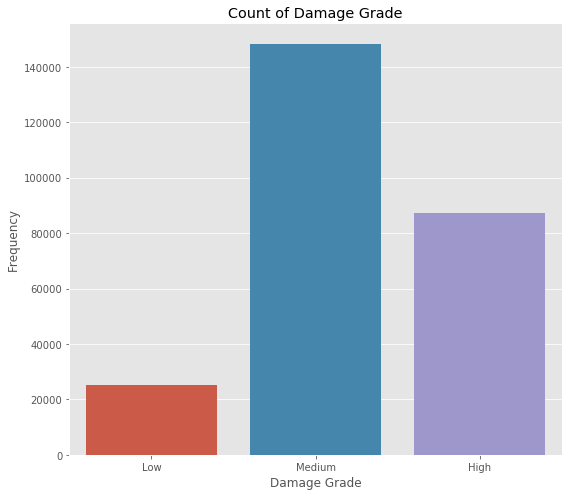

In [20]:
plt.figure(figsize = (8,7))
sns.countplot(x='damage_grade',data=df)
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.title('Count of Damage Grade')
plt.tight_layout()

* From the above about 56.89% of the damage grade on the buildings has a severity level medium, followed by high with 33.47% and low 9.64%. This implies that majority of te building in nepal has a meduim and high level damage following the earthquake, with only few buildins ahving low damage grade level

#### lets take a look at the the taret variable and the other independent variables

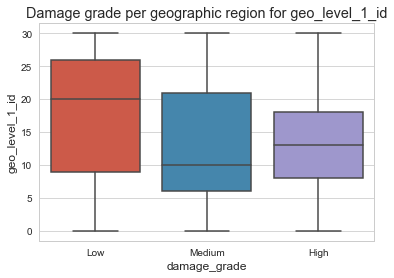

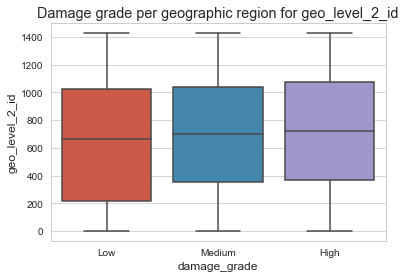

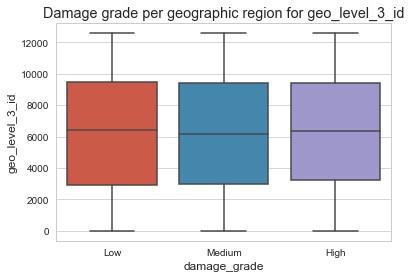

In [23]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Damage grade per geographic region for ' + str(col))
        plt.show()
        

num_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
plot_box(df, num_cols)

* From the above, we begin by looking at building that exist at geographic level one(1) it appears that most building in this geographic region has a low damage grade with about 75% of the building residing in geographic level 9 to 26, also damage grade on building residing in geographic level two has low damage grade similar to geographic level 1, with about 75% of the building residing from 200 and above. Lastly buildings in geographic level 3 has similar damage grade across all geographic levels.

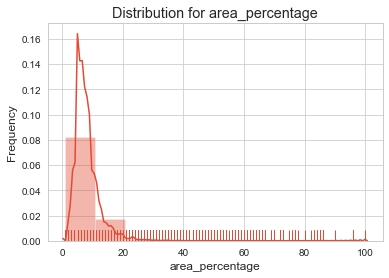

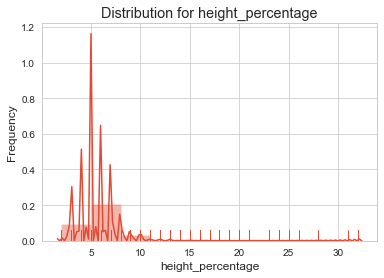

In [24]:
column=['area_percentage', 'height_percentage']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(df, column, hist= True)

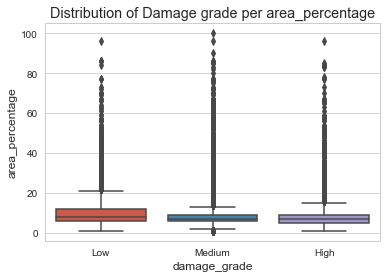

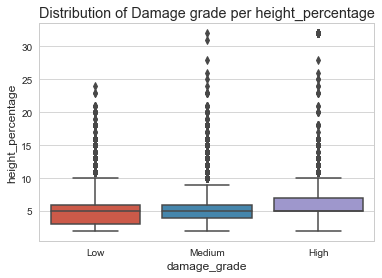

In [25]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Distribution of Damage grade per ' + str(col))
        plt.show()
        

num_cols = ['area_percentage', 'height_percentage']
plot_box(df, num_cols)

* The above charts illustrate the distribution damage grade on area and height of building. We can see here that most of the damage grade are low damage grade and high damage

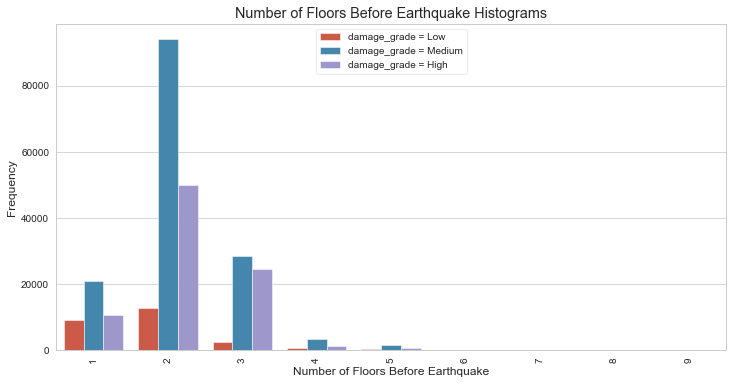

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = Low","damage_grade = Medium","damage_grade = High"])
plt.show()

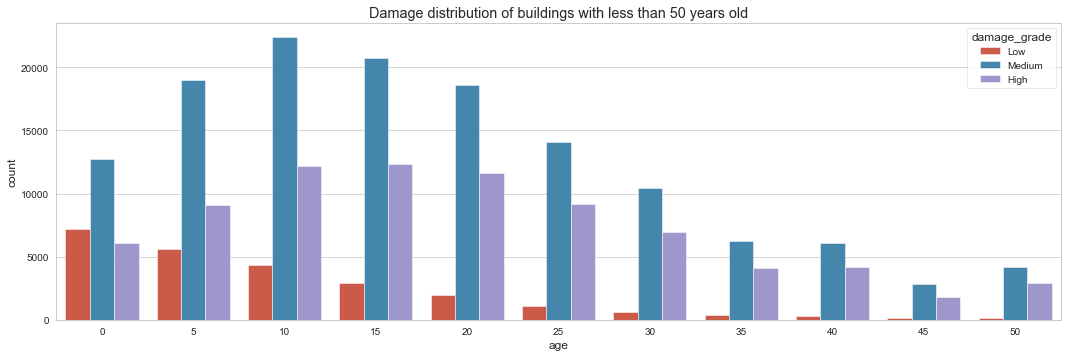

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings with less than 50 years old')
tr=df[df['age']<=50]
sns.countplot(x='age',data=tr,hue='damage_grade')

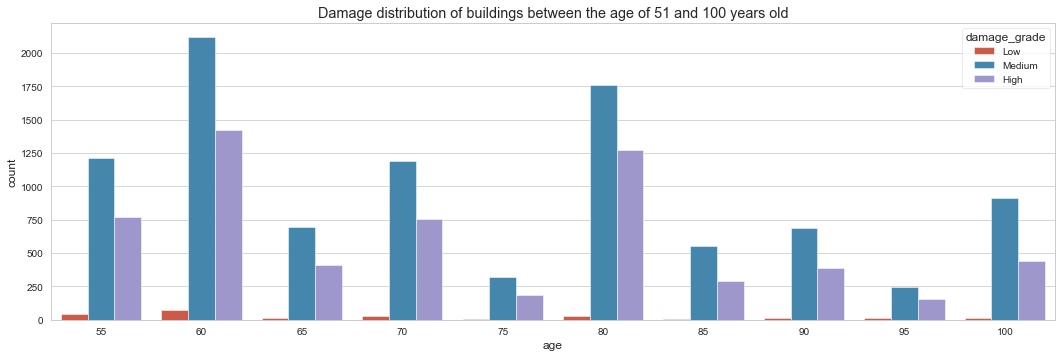

In [29]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 51 and 100 years old')
tr = df.loc[(df['age'] > 50) & (df['age']<=100)]
sns.countplot(x='age',data=tr,hue='damage_grade')

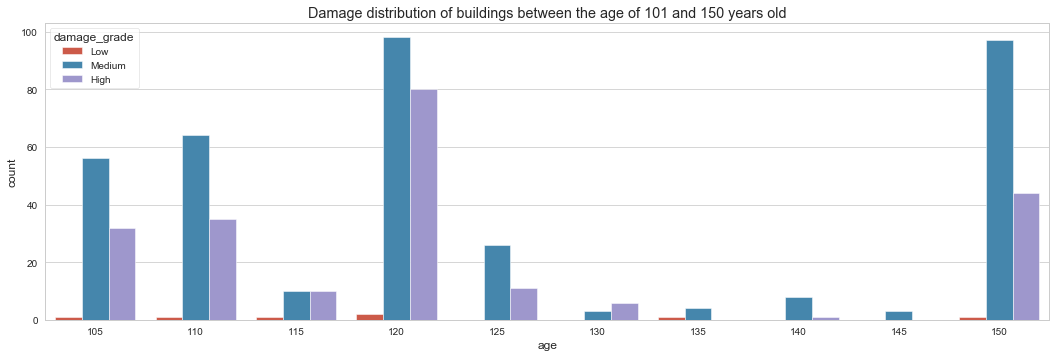

In [31]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 101 and 150 years old')
tr = df.loc[(df['age'] > 100) & (df['age']<=150)]
sns.countplot(x='age',data=tr,hue='damage_grade')

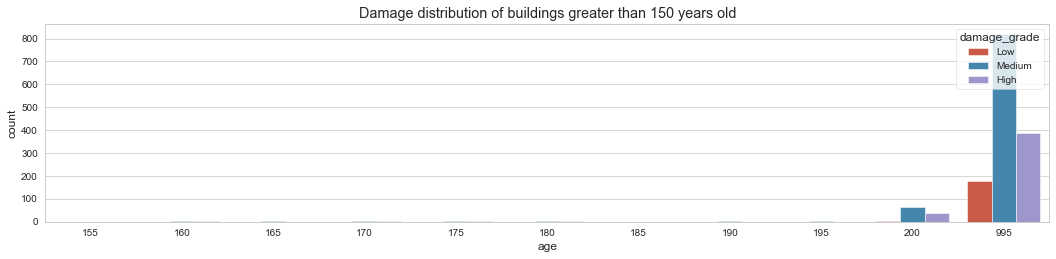

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.title('Damage distribution of buildings greater than 150 years old')
tr=df[df['age']>150]
sns.countplot(x='age',data=tr,hue='damage_grade')

* A significant observation to note from the above chart shows that building with with less than 50 years of age has a dominating damage grade that is medium, with notable increase of damage on buildings between zero to 20 years of age, with a steady decline from 25 years of age to 45 years of age,another interesting observation here is that building with 100 years and 150 years also has a increase in damage grade with severity that is medium. This implies that age has a major factor in determining the level of damage that is going to affeat the building

In [22]:
for data, row in df.iterrows():
    if row.age <= 20:
        df.loc[data, 'age'] = '<50'
    elif row.age > 50 and row.age <= 100:
        df.loc[data, 'age'] = '51-100'
    elif row.age > 100 and row.age <= 150:
        df.loc[data, 'age'] = '100-150'
    elif row.age > 150 :
        df.loc[data, 'age'] = '>150'

In [23]:
df.age.value_counts()

<50        242457
51-100      16020
>150         1529
100-150       595
Name: age, dtype: int64

In [25]:
pd.crosstab(df['damage_grade'],df['age'])

age,100-150,51-100,<50,>150
damage_grade,,,,
Low,7,244,24691,182
Medium,369,9682,137300,908
High,219,6094,80466,439


In [24]:
pd.crosstab(df['damage_grade'],df['age'], normalize=True)*100

age,100-150,51-100,<50,>150
damage_grade,,,,
Low,0.002686,0.093630,9.474637,0.069839
Medium,0.141596,3.715258,52.685907,0.348425
High,0.084037,2.338441,30.877088,0.168457


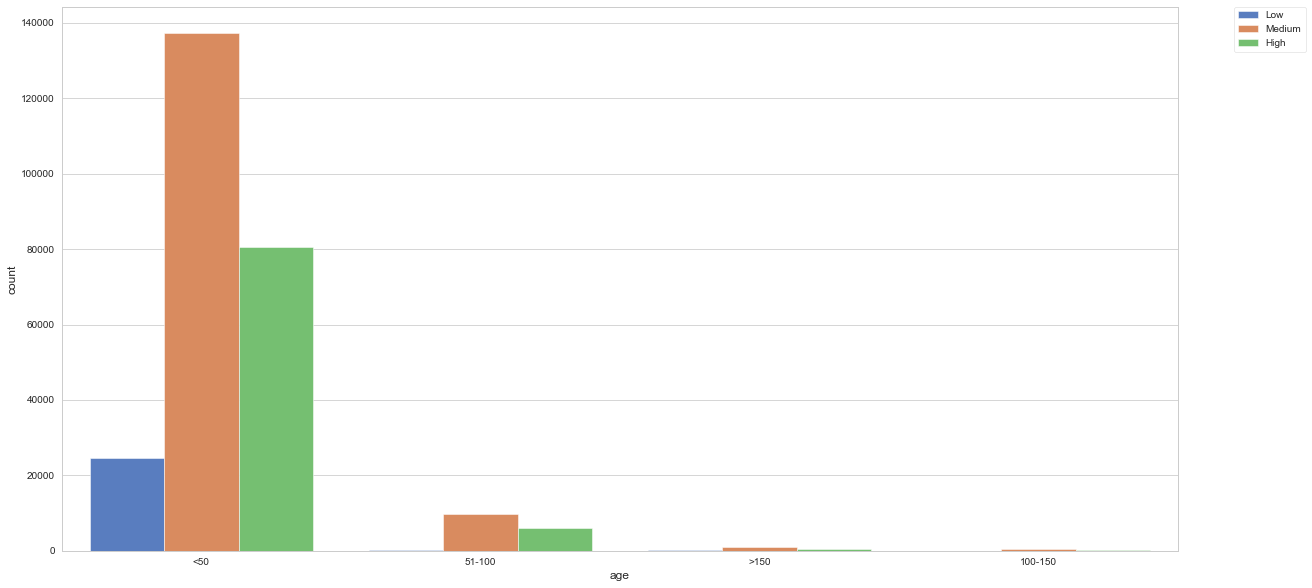

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="age", hue="damage_grade", palette="muted",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

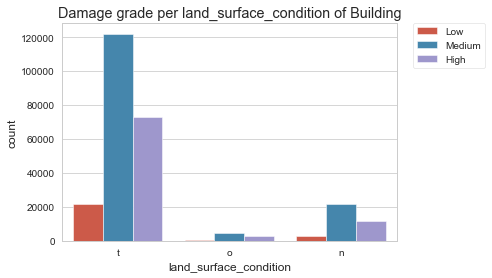

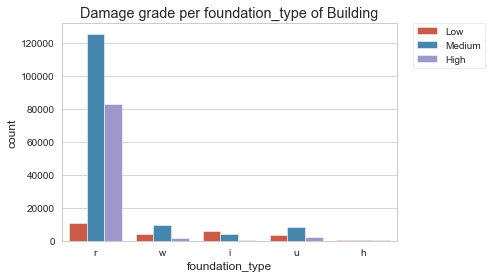

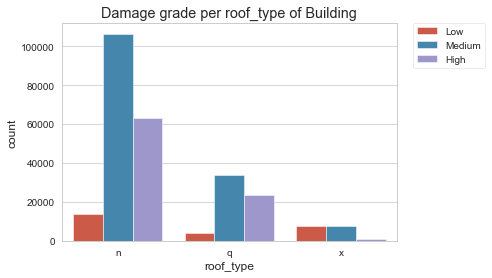

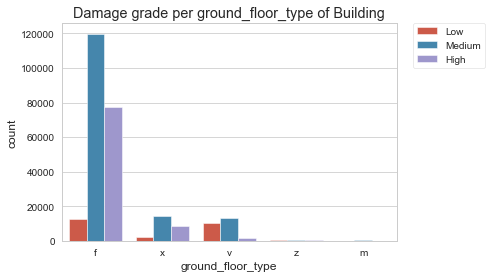

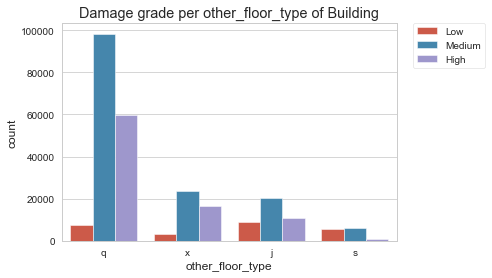

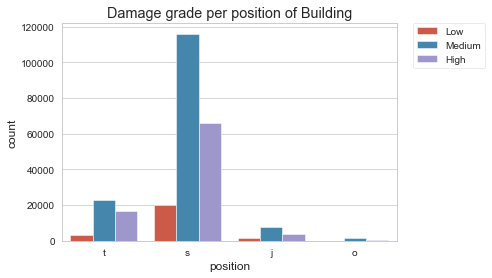

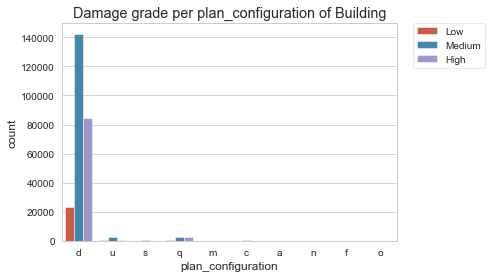

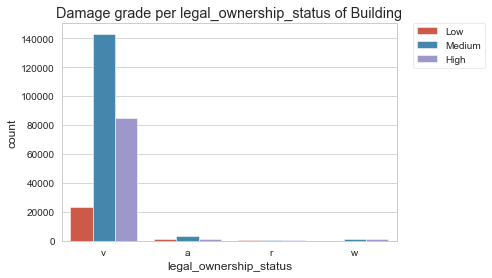

In [33]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for  col in (cols):
    #for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade per ' + str(col)+' of Building')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)

Notable Insights
Looking at the land surface condition of the building, the type T has a significant impact on the severity of damage on the building
Looking at the foundation type, we can observe that floor  type of the value R has a significant impact on the severity of damage on the building 
Also ground floor type of the type F has a significant impact on the level of damage on the building 

Many of the of the findings here are observational as we can see, and it show they are going to have a significant impact when building our model

### Other variables explored with the dependent variable

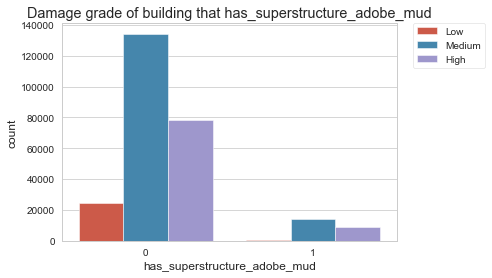

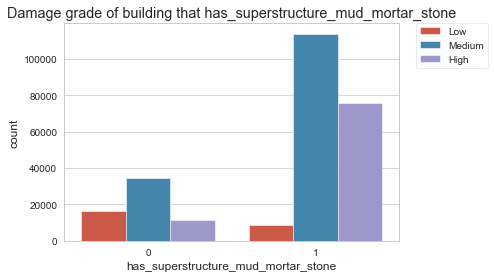

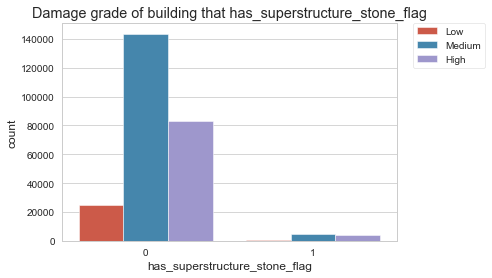

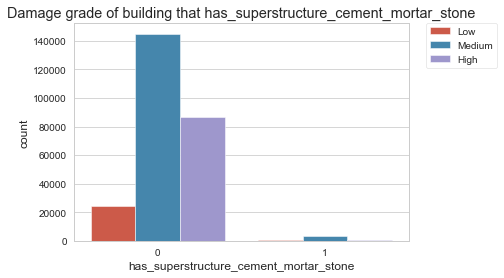

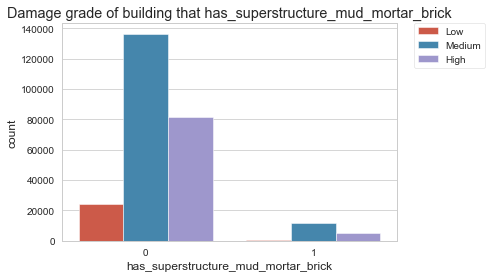

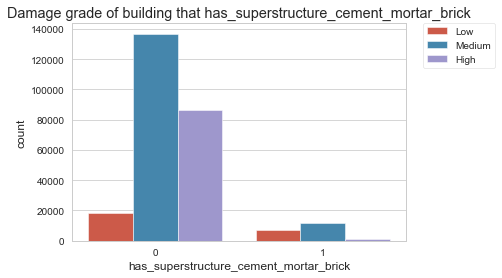

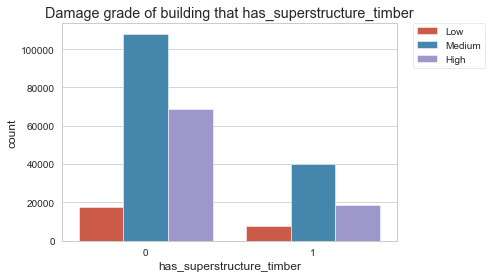

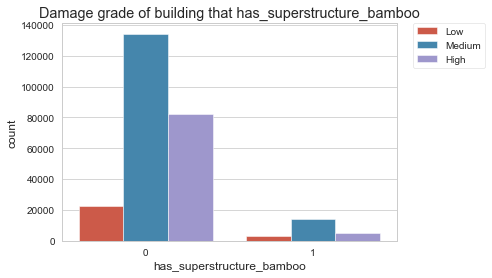

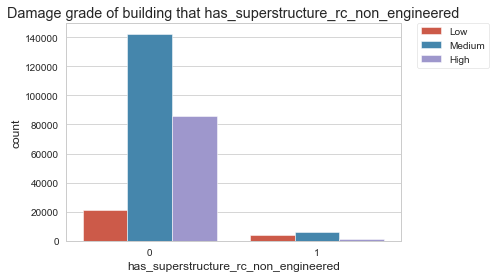

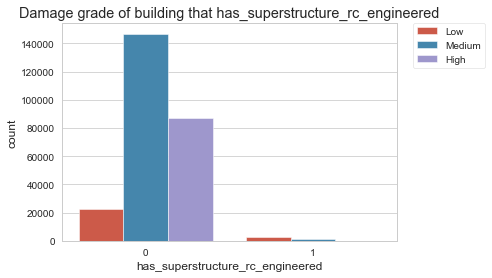

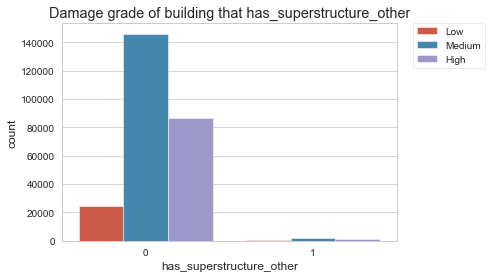

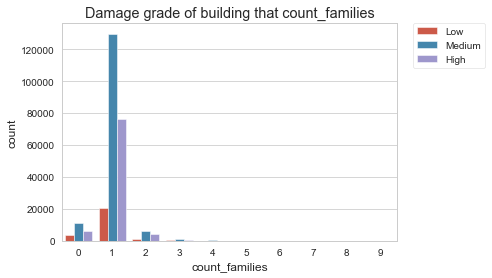

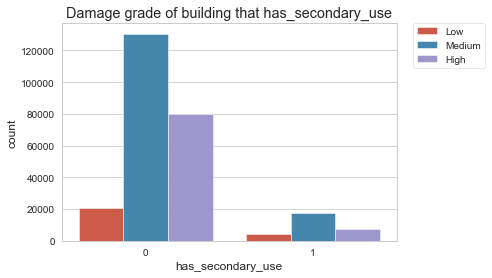

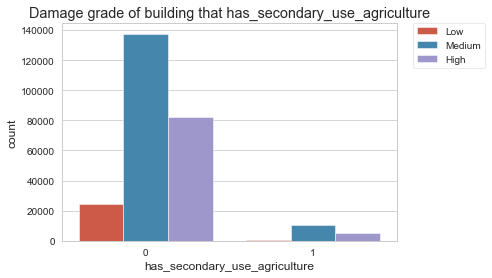

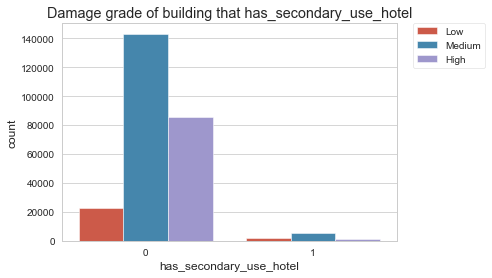

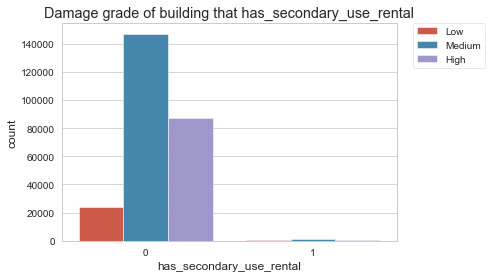

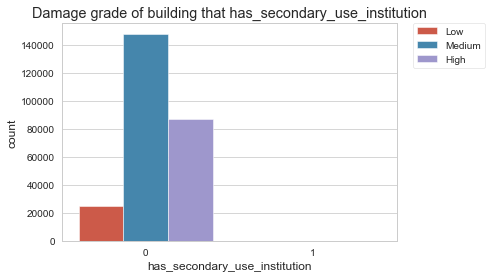

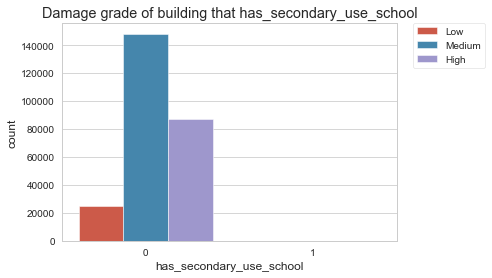

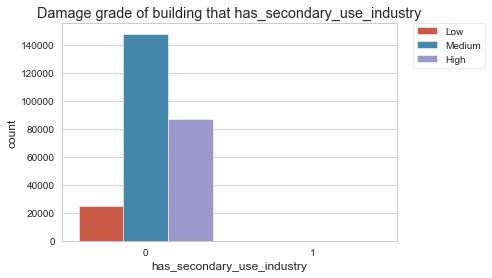

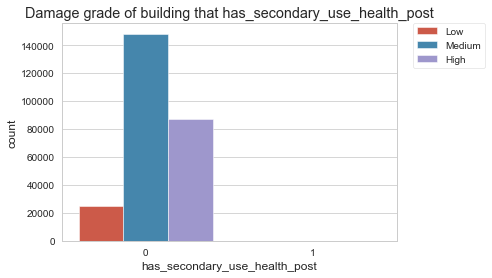

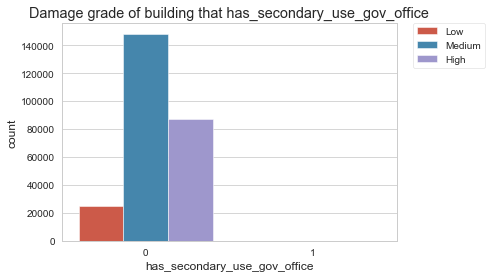

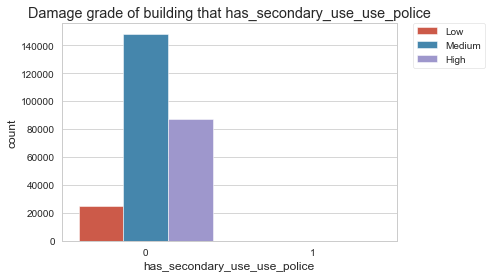

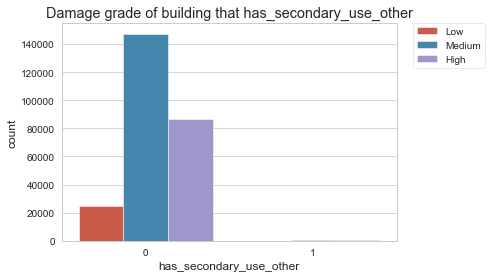

In [34]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade of building that ' + str(col))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_num_cols = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                             'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use',
                             'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution',
                             'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
                             'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']
plot_box(df, cat_num_cols)

#### Multivariant Analysis

In [35]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [37]:
features=df[['damage_grade','geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [38]:
doc={'Low':1, 'Medium':2,  'High':3}
dataset=[features]
for data in dataset:
    features['damage_grade']=features['damage_grade'].replace(doc)

In [39]:
corr_matrix=features.corr()

In [40]:
corr_matrix

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,1.000000,-0.072347,0.043161,0.007932,0.122308,0.029273,-0.125221,0.048130,0.055314,0.291325,...,0.011309,-0.097942,-0.083754,-0.028728,-0.011692,-0.011024,-0.008543,-0.009378,-0.001656,-0.016334
geo_level_1_id,-0.072347,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992
geo_level_2_id,0.043161,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068
geo_level_3_id,0.007932,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463
count_floors_pre_eq,0.122308,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,0.029273,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,...,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534
area_percentage,-0.125221,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,...,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111
height_percentage,0.048130,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,...,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397
has_superstructure_adobe_mud,0.055314,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,...,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074
has_superstructure_mud_mortar_stone,0.291325,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,...,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628


In [41]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

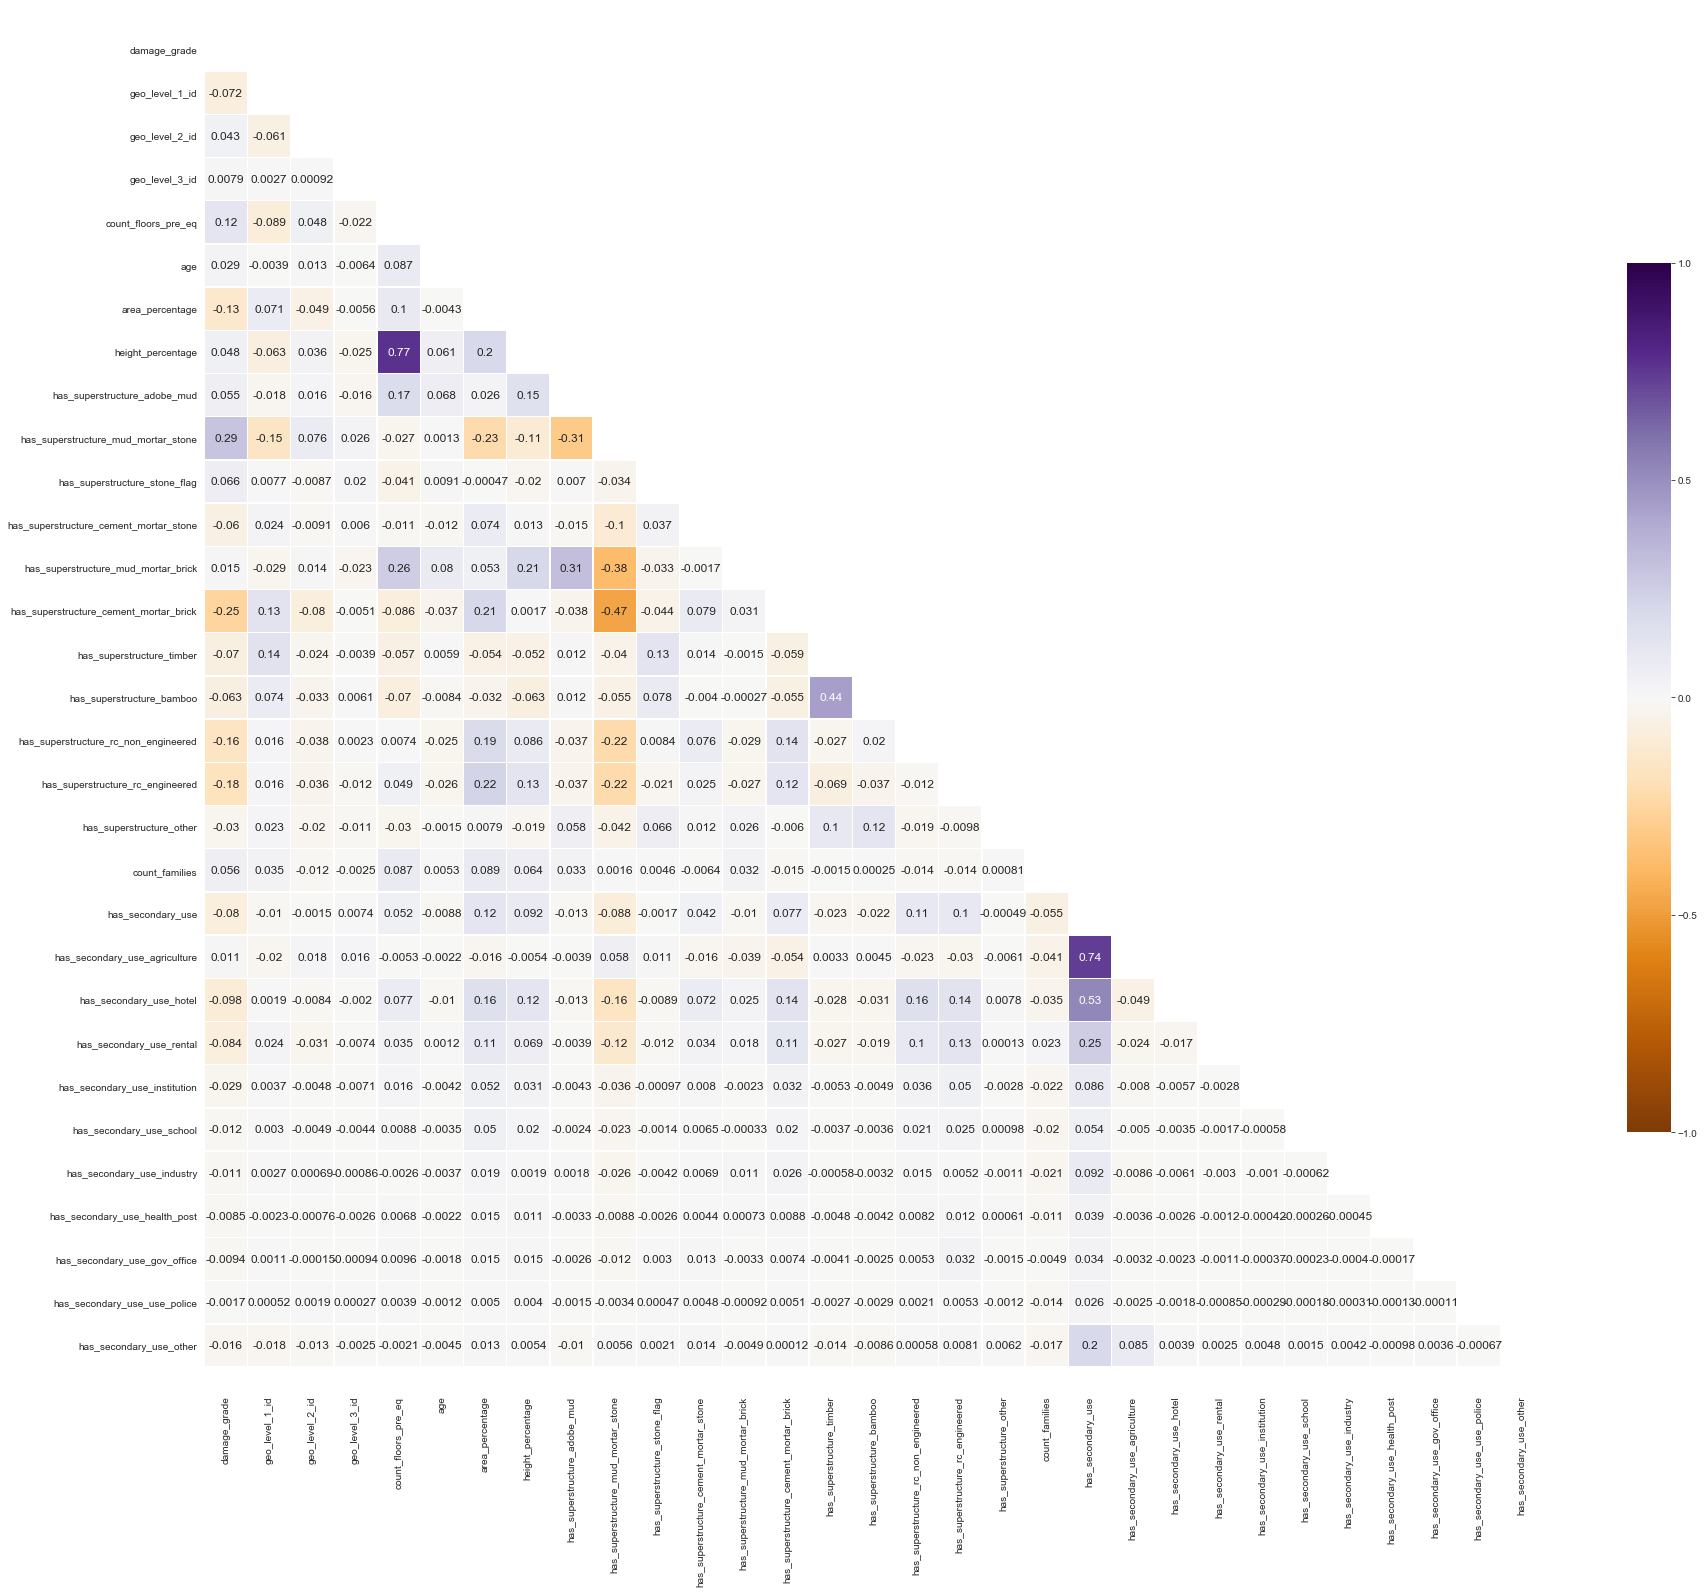

In [42]:
f, ax = plt.subplots(figsize=(30, 40))
heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'PuOr',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [45]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.6)
print('correlated features: ', len(set(corr_features)) )

correlated features:  2


In [46]:
corr_features

{'has_secondary_use_agriculture', 'height_percentage'}

* Form the correclation matrix we can see that 'has_secondary_use_agriculture' and 'height_percentage' is highly correlated. We can either drop both or one of them but we cant keep both when building our model

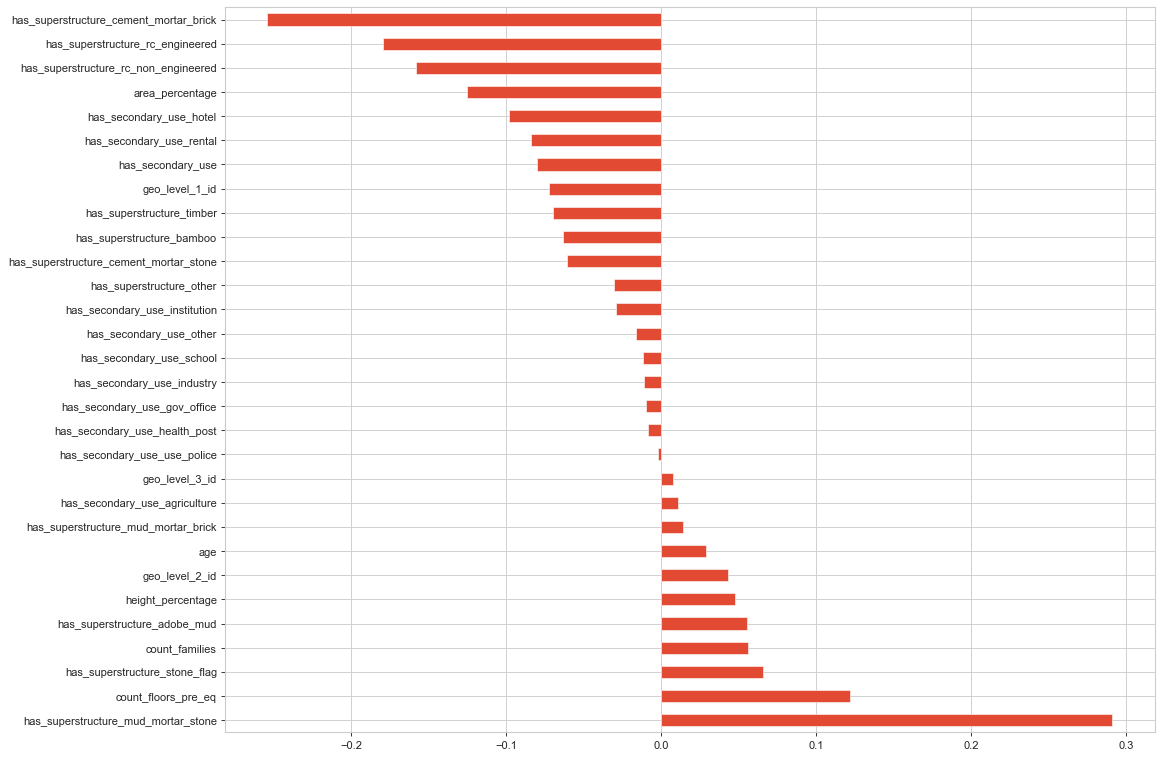

In [67]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k')
corr_matrix.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh() 

### Data Modeling

* This stage involves training a machine learning model with all the listed features to make predictions for the target variable Damage_Grade. We selected damage grade as the target feature given the goal of the project to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal
* To measure the performance of our algorithms, we'll use the `F1 score` which balances the precision and recall of a classifier.
* Traditionally, the `F1 score` is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged `F1 score`.

In [21]:
#lets look at the distribution of the target varable- damage grade
df.damage_grade.value_counts(normalize=True)*100

Medium    56.891186
High      33.468022
Low        9.640792
Name: damage_grade, dtype: float64

In [22]:
# Fill Categorical columns with Missing
for col in df.select_dtypes(include=['object']):
    df[col].replace(np.nan, 'Null', inplace=True)
    
for col in df.select_dtypes(include=['int64', 'float64']):
    df[col].replace(np.nan, -999, inplace=True)

In [23]:
df=df.drop(['building_id','has_secondary_use_agriculture'], axis=1)

In [24]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
     

In [25]:
df.dtypes

geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                      object
foundation_type                             object
roof_type                                   object
ground_floor_type                           object
other_floor_type                            object
position                                    object
plan_configuration                          object
has_superstructure_adobe_mud                 int64
has_superstructure_mud_mortar_stone          int64
has_superstructure_stone_flag                int64
has_superstructure_cement_mortar_stone       int64
has_superstructure_mud_mortar_brick          int64
has_superstructure_cement_morta

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

####  Scaling features and gettin dummies

In [63]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = df.copy()

col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage','count_floors_pre_eq' ,'height_percentage']

features = scaled_df[col]
features = std_scaler.fit_transform(features.values)
scaled_df[col] = features

In [64]:
X = pd.get_dummies(scaled_df.drop('damage_grade', axis=1))
y = scaled_df.damage_grade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

#### Selecting our baseline model
NB: I used the synthetic minority oversampling metho to see if it will imporve the performance of our model

In [29]:
rf_clf = RandomForestClassifier() 
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              rf_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=2)

In [31]:
xg_clf = xgb.XGBClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              xg_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=10)

In [32]:
gbr_clf=GradientBoostingClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              gbr_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=10)

In [33]:
log_clf= LogisticRegression()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              log_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="f1_micro", cv=10)

In [34]:
print(f"Random Forest model's average f1: {scores.mean():.3f}")

print(f"Xgboost model's average f1: {scores.mean():.3f}")

print(f"Gradient Boosting model's average f1: {scores.mean():.3f}")

print(f"Logistic Regression model's average f1: {scores.mean():.3f}")

Random Forest model's average f1: 0.508
Xgboost model's average f1: 0.508
Gradient Boosting model's average f1: 0.508
Logistic Regression model's average f1: 0.508


* After trying out smte with diffrent algorithm and perofrming cross validation it appears the model average is the same, i then proceed to randomly choose one of the algorithm as our base line model

## Results and Evaluation

In [75]:
##Performing prediction with the model randomly selected
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=3, 
                    learning_rate=0.3)
xgb.fit(X_train,y_train)

xg_pred = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
y_test_lb = lb.fit_transform(y_test)
y_test_lb = lb.transform(y_test)
xg_pred_lb = lb.transform(xg_pred)
recall_score(y_test_lb, xg_pred_lb, average='micro')

0.6957444903493176

In [76]:
prediction= xgb.predict(X_test)

In [77]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[13614    91 12461]
 [   79  3018  4504]
 [ 5239  1413 37762]]
              precision    recall  f1-score   support

        High       0.72      0.52      0.60     26166
         Low       0.67      0.40      0.50      7601
      Medium       0.69      0.85      0.76     44414

    accuracy                           0.70     78181
   macro avg       0.69      0.59      0.62     78181
weighted avg       0.70      0.70      0.68     78181



In [79]:
print("Train score: %.3f" % xgb.score(X_train, y_train))
print("Test score: %.3f" % xgb.score(X_test, y_test))

Train score: 0.697
Test score: 0.696


In [80]:
output = pd.DataFrame()
output['Actual Output'] = y_test
output['Predicted Output'] = prediction
output.tail()

,Actual Output,Predicted Output
17267,High,Medium
66715,Medium,Medium
243127,High,High
2108,High,Medium
42976,Medium,Medium


In [85]:
# Create a confusion matrix
def cm_analysis(y_true, y_pred, labels, model, ymap=None, figsize=(8,6), cmap=plt.cm.Blues):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    
    accuracy= model.score(X_test, y_test)
    misclass = 1-accuracy
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)

    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    # cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap=cmap)
    plt.xlabel('Predicted \nAccuracy={:0.2f}; Misclassification={:0.2f}'.format(accuracy, misclass))
    plt.title('Model Confusion Matrix using XGBoost')
    plt.show()

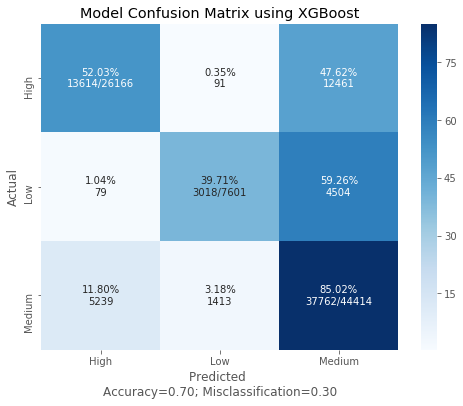

In [87]:
cm_analysis(y_true=y_test, 
            y_pred=prediction, 
            model = xgb,
            labels=['High', 'Low', 'Medium'])

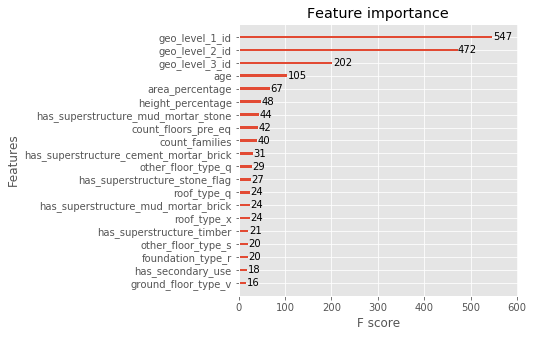

In [88]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plot_importance(xgb, max_num_features=20, ax=ax)

# Finally a pipeline was built for easy workflow of the model

In [95]:
X= df.drop('damage_grade', axis=1)
y= df['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the preprocessing pipeline
num_feat= X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999)),
    ('scaler', StandardScaler())])

cat_feat= X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feat),
        ('cat', categorical_transformer, cat_feat)])

# Append regressor to pipeline
model_p= Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', XGBClassifier(booster='gbtree', objective='multi:softprob', 
                                                  random_state=1, eval_metric="auc", num_class=3))])

model_p.fit(X_train, y_train)
print("Train score: %.3f" % model_p.score(X_train, y_train))
print("Test score: %.3f" % model_p.score(X_test, y_test))

y_pred= model_p.predict(X_test)

Train score: 0.675
Test score: 0.675


## Lastly, we test with the out of sample data

In [96]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [103]:
test_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [104]:
newdf = test_data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']].copy()
newdf.shape

(86868, 38)

In [105]:
test_pred = model_p.predict(newdf)
test_pred_proba = model_p.predict_proba(newdf)

In [109]:
final_pred = pd.DataFrame({'building_id': test_data.building_id, 'damage_grade':test_pred, 'High_Prob':test_pred_proba[:,0],
                           'Low_Prob':test_pred_proba[:,1], 'Medium_Prob': test_pred_proba[:,2]})
final_pred.head()

,building_id,damage_grade,High_Prob,Low_Prob,Medium_Prob
0,300051,High,0.788992,0.019573,0.191434
1,99355,Medium,0.237041,0.017221,0.745738
2,890251,Medium,0.188139,0.093340,0.718521
3,745817,Low,0.012166,0.661485,0.326349
4,421793,High,0.785949,0.019389,0.194662


####  Deployment
The Deployment to be executed for this project will be in the form of story telling using a blog or article which is available  <a href='https://medium.com/@oyelamifiyin/richters-predictor-modeling-earthquake-damage-b44e3dbdaef'> here.</a> A web application may be considered in the future as well as further analysis to discover insights that will be useful in training the machine learning model to improve the current performance of the model in making predictions for unseen future data.
